In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
pd.options.display.max_rows = 15
import datetime as dt
from __future__ import division
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.random as rndn
from __future__ import division
from numpy.random import randn
import os
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
import matplotlib
matplotlib.style.use('ggplot')

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dfStateTemp=pd.read_csv("GlobalLandTemperaturesByState.csv")
dfStateTemp

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
5,1855-10-01,25.442,1.179,Acre,Brazil
6,1855-11-01,25.400,1.064,Acre,Brazil
...,...,...,...,...,...
645668,2013-03-01,12.116,0.345,Zhejiang,China
645669,2013-04-01,15.710,0.461,Zhejiang,China


In [3]:
import pandas as pd

In [4]:
dfStateTemp['dt'] = pd.to_datetime(dfStateTemp['dt'])
dfStateTemp.dtypes


dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

In [5]:
dfStateTemp.index = dfStateTemp['dt']

In [6]:
del dfStateTemp['dt']

In [7]:
dfStateTemp = dfStateTemp['1/1/1850':'31/12/2010']
dfStateTemp

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
1855-05-01 00:00:00,25.544,1.171,Acre,Brazil
1855-06-01 00:00:00,24.228,1.103,Acre,Brazil
1855-07-01 00:00:00,24.371,1.044,Acre,Brazil
1855-08-01 00:00:00,25.427,1.073,Acre,Brazil
1855-09-01 00:00:00,25.675,1.014,Acre,Brazil
1855-10-01 00:00:00,25.442,1.179,Acre,Brazil
1855-11-01 00:00:00,25.400,1.064,Acre,Brazil
...,...,...,...,...
2010-06-01,23.277,0.274,Zhejiang,China


In [8]:
dfStateTemp=dfStateTemp.dropna()


In [9]:
dfTempNewYork=dfStateTemp.loc[dfStateTemp['State'] == 'New York']  

In [10]:
dfTempNewYork

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
1850-01-01 00:00:00,-4.243,1.329,New York,United States
1850-02-01 00:00:00,-4.287,1.669,New York,United States
1850-03-01 00:00:00,-1.476,2.957,New York,United States
1850-04-01 00:00:00,3.619,1.938,New York,United States
1850-05-01 00:00:00,9.599,0.819,New York,United States
1850-06-01 00:00:00,18.270,1.033,New York,United States
1850-07-01 00:00:00,20.597,0.998,New York,United States
...,...,...,...,...
2010-06-01,19.171,0.249,New York,United States


In [11]:
dfTempCali=dfStateTemp.loc[dfStateTemp['State'] == 'California']  

In [12]:
dfTempIllinois=dfStateTemp.loc[dfStateTemp['State'] == 'Illinois']  

In [13]:
dfTempTex=dfStateTemp.loc[dfStateTemp['State'] == 'Texas']  

In [14]:
dfTempFlor=dfStateTemp.loc[dfStateTemp['State'] == 'Florida']  

In [15]:
dfTempNewYork_A=dfTempNewYork.resample("A", how='mean')

dfTempCali_A=dfTempCali.resample("A", how='mean')

dfTempIllinois_A=dfTempIllinois.resample("A", how='mean')

dfTempTex_A=dfTempTex.resample("A", how='mean')

dfTempFlor_A=dfTempFlor.resample("A", how='mean')

dfTempNewYork_A


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


,AverageTemperature,AverageTemperatureUncertainty
dt,,
1850-12-31 00:00:00,6.661167,1.364500
1851-12-31 00:00:00,6.686583,1.383667
1852-12-31 00:00:00,6.594917,1.229333
1853-12-31 00:00:00,7.103083,1.115583
1854-12-31 00:00:00,7.189333,1.314500
1855-12-31 00:00:00,6.700333,1.322333
1856-12-31 00:00:00,5.852583,1.193000
...,...,...
2004-12-31,7.904000,0.213250


In [16]:
plt.plot(dfTempNewYork_A.index, dfTempNewYork_A['AverageTemperature'],'k--',color='r', label='New York')
plt.plot(dfTempCali_A.index, dfTempCali_A['AverageTemperature'], 'k--',color='b', label = 'California')
plt.plot(dfTempIllinois_A.index, dfTempIllinois_A['AverageTemperature'], 'k--',color='g', label='Illinois')
plt.plot(dfTempTex_A.index, dfTempTex_A['AverageTemperature'], 'k--',color='y', label='Texas')
plt.plot(dfTempFlor_A.index, dfTempFlor_A['AverageTemperature'], 'k--',color='w', label='Florida')
plt.xlabel('Year')
plt.ylabel('Temperature - Celsius')
plt.legend()

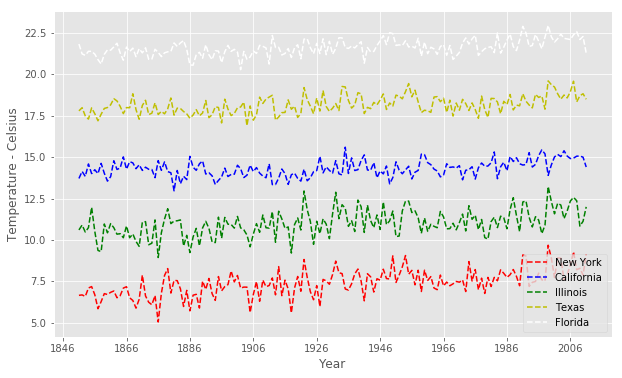

In [17]:
plt.show()

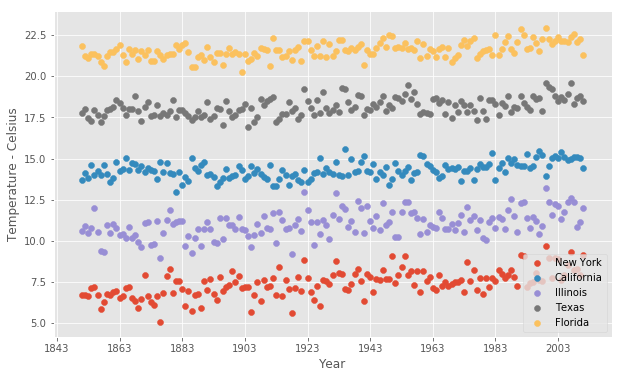

In [18]:
plt.scatter(dfTempNewYork_A.index, dfTempNewYork_A['AverageTemperature'], label='New York')
plt.scatter(dfTempCali_A.index, dfTempCali_A['AverageTemperature'], label = 'California')
plt.scatter(dfTempIllinois_A.index, dfTempIllinois_A['AverageTemperature'], label='Illinois')
plt.scatter(dfTempTex_A.index, dfTempTex_A['AverageTemperature'], label='Texas')
plt.scatter(dfTempFlor_A.index, dfTempFlor_A['AverageTemperature'], label='Florida')
plt.xlabel('Year')
plt.ylabel('Temperature - Celsius')
plt.legend()
plt.show()

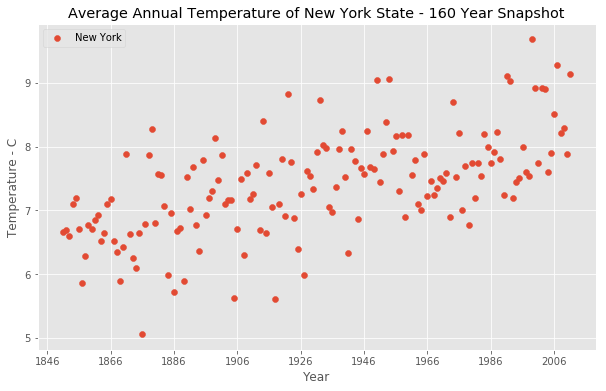

In [19]:
plt.scatter(dfTempNewYork_A.index, dfTempNewYork_A['AverageTemperature'], label='New York')

plt.xlabel('Year')
plt.ylabel('Temperature - C')
plt.title('Average Annual Temperature of New York State - 160 Year Snapshot')
plt.legend()
plt.show()

In [20]:
dfNewYorkTemp_M=dfTempNewYork_A['1/1/1850':'12/31/1900']
print "NY 1850-1900:", dfNewYorkTemp_M["AverageTemperature"].mean()

dfNewYorkTemp_M=dfTempNewYork_A['1/1/1900':'12/31/1950']
print "NY 1900-1950:", dfNewYorkTemp_M["AverageTemperature"].mean()

dfNewYorkTemp_M=dfTempNewYork_A['1/1/1950':'12/31/2000']
print "NY 1950-2000:", dfNewYorkTemp_M["AverageTemperature"].mean()

dfNewYorkTemp_M=dfTempNewYork_A['1/1/2000':'12/31/2010']
print "NY 2000-2010:", dfNewYorkTemp_M["AverageTemperature"].mean()

NY 1850-1900: 6.84980228758
NY 1900-1950: 7.38080718954
NY 1950-2000: 7.77340359477
NY 2000-2010: 8.39877272727


In [21]:
dfCaliTemp_M=dfTempCali_A['1/1/1850':'12/31/1900']
print "CA 1850-1900:", dfCaliTemp_M["AverageTemperature"].mean()

dfCaliTemp_M=dfTempCali_A['1/1/1900':'12/31/1950']
print "CA 1900-1950:", dfCaliTemp_M["AverageTemperature"].mean()

dfCaliTemp_M=dfTempCali_A['1/1/1950':'12/31/2000']
print "CA 1950-2000:", dfCaliTemp_M["AverageTemperature"].mean()

dfCaliTemp_M=dfTempCali_A['1/1/2000':'12/31/2010']
print "CA 2000-2010:", dfCaliTemp_M["AverageTemperature"].mean()

CA 1850-1900: 14.1718676471
CA 1900-1950: 14.1560098039
CA 1950-2000: 14.4832336601
CA 2000-2010: 15.0090378788


In [22]:
dfTexTemp_M=dfTempTex_A['1/1/1850':'12/31/1900']
print "TX 1850-1900:", dfTexTemp_M["AverageTemperature"].mean()

dfTexTemp_M=dfTempTex_A['1/1/1900':'12/31/1950']
print "TX 1900-1950:", dfTexTemp_M["AverageTemperature"].mean()

dfTexTemp_M=dfTempTex_A['1/1/1950':'12/31/2000']
print "TX 1950-2000:", dfTexTemp_M["AverageTemperature"].mean()

dfTexTemp_M=dfTempTex_A['1/1/2000':'12/31/2010']
print "TX 2000-2010:", dfTexTemp_M["AverageTemperature"].mean()

TX 1850-1900: 17.8448986928
TX 1900-1950: 18.1600718954
TX 1950-2000: 18.3432075163
TX 2000-2010: 18.8029848485


In [23]:
dfFlorTemp_M=dfTempFlor_A['1/1/1850':'12/31/1900']
print "FL 1850-1900:", dfFlorTemp_M["AverageTemperature"].mean()

dfFlorTemp_M=dfTempFlor_A['1/1/1900':'12/31/1950']
print "FL 1900-1950:", dfFlorTemp_M["AverageTemperature"].mean()

dfFlorTemp_M=dfTempFlor_A['1/1/1950':'12/31/2000']
print "FL 1950-2000:", dfFlorTemp_M["AverageTemperature"].mean()

dfFlorTemp_M=dfTempFlor_A['1/1/2000':'12/31/2010']
print "FL 2000-2010:",dfFlorTemp_M["AverageTemperature"].mean()

FL 1850-1900: 21.3342990196
FL 1900-1950: 21.5903137255
FL 1950-2000: 21.7917745098
FL 2000-2010: 22.1476818182


In [24]:
dfILTemp_M=dfTempIllinois_A['1/1/1850':'12/31/1900']
print "IL 1850-1900:",dfILTemp_M["AverageTemperature"].mean()

dfILTemp_M=dfTempIllinois_A['1/1/1900':'12/31/1950']
print "IL 1900-1950:",dfILTemp_M["AverageTemperature"].mean()

dfILTemp_M=dfTempIllinois_A['1/1/1950':'12/31/2000']
print "IL 1950-2000:",dfILTemp_M["AverageTemperature"].mean()

dfILTemp_M=dfTempIllinois_A['1/1/2000':'12/31/2010']
print "IL 2000-2010:", dfILTemp_M["AverageTemperature"].mean()

IL 1850-1900: 10.5432859477
IL 1900-1950: 11.0750686275
IL 1950-2000: 11.2471617647
IL 2000-2010: 11.8407272727


In [25]:
dfTempNewYork_A['PC'] = dfTempNewYork_A.pct_change()['AverageTemperature']*100
dfTempCali_A['PC'] = dfTempCali_A.pct_change()['AverageTemperature']*100
dfTempFlor_A['PC'] = dfTempFlor_A.pct_change()['AverageTemperature']*100
dfTempTex_A['PC'] = dfTempTex_A.pct_change()['AverageTemperature']*100
dfTempIllinois_A['PC'] = dfTempIllinois_A.pct_change()['AverageTemperature']*100

In [26]:
dfTempNewYork_A

,AverageTemperature,AverageTemperatureUncertainty,PC
dt,,,
1850-12-31 00:00:00,6.661167,1.364500,NaN
1851-12-31 00:00:00,6.686583,1.383667,0.381565
1852-12-31 00:00:00,6.594917,1.229333,-1.370904
1853-12-31 00:00:00,7.103083,1.115583,7.705430
1854-12-31 00:00:00,7.189333,1.314500,1.214261
1855-12-31 00:00:00,6.700333,1.322333,-6.801743
1856-12-31 00:00:00,5.852583,1.193000,-12.652356
...,...,...,...
2004-12-31,7.904000,0.213250,4.062757


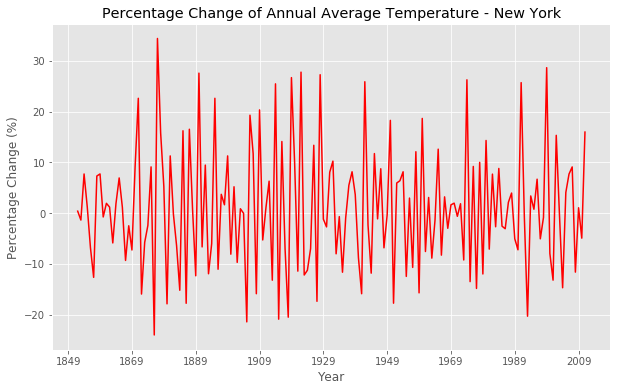

In [27]:
dfTempNewYork_A.dropna()
dfTempCali_A.dropna()
dfTempFlor_A.dropna()
dfTempTex_A.dropna()
dfTempIllinois_A.dropna()

plt.plot(dfTempNewYork_A.index, dfTempNewYork_A['PC'],color='r')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change of Annual Average Temperature - New York')
plt.show()

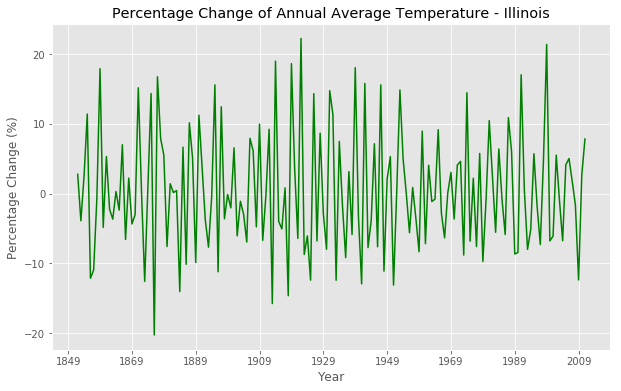

In [28]:
plt.plot(dfTempIllinois_A.index, dfTempIllinois_A['PC'],color='g')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change of Annual Average Temperature - Illinois')
plt.show()

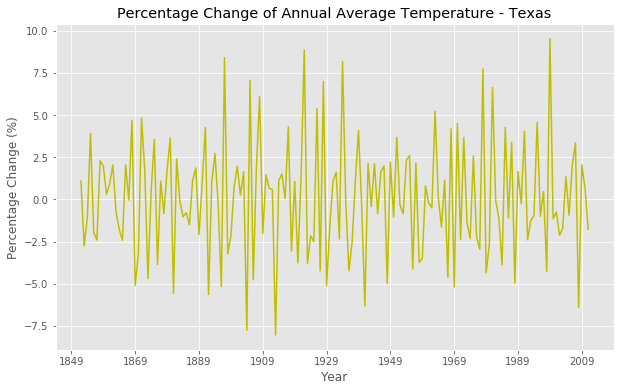

In [29]:
plt.plot(dfTempTex_A.index, dfTempTex_A['PC'],color='y')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change of Annual Average Temperature - Texas')

plt.show()

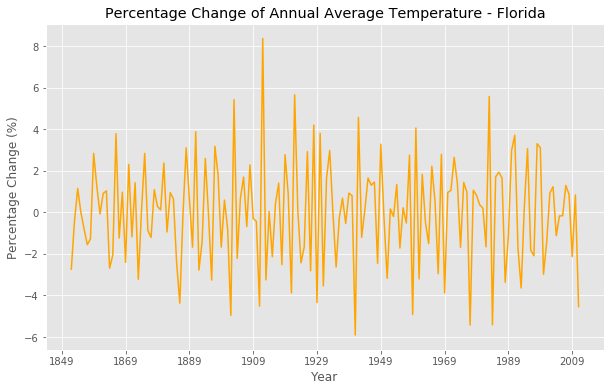

In [30]:
plt.plot(dfTempFlor_A.index, dfTempFlor_A['PC'], color='orange', label='Florida')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change of Annual Average Temperature - Florida')

plt.show()

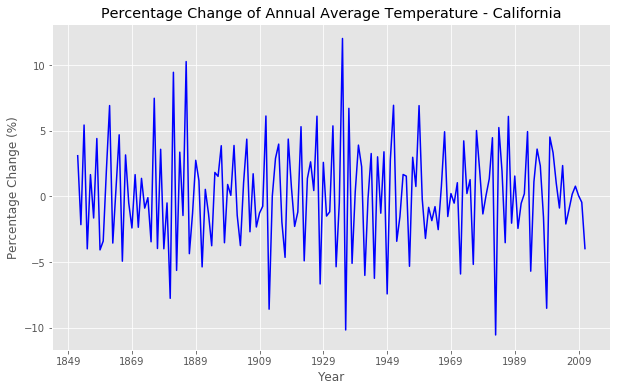

In [31]:
plt.plot(dfTempCali_A.index, dfTempCali_A['PC'],color='b')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change of Annual Average Temperature - California')
plt.show()

In [32]:
#AVERAGE percentage change, each state is showing a positive mean
dfTempTex_A["PC"].mean()

0.08148004404213112

In [33]:
dfTempCali_A["PC"].mean()

0.10903248208666769

In [34]:
dfTempIllinois_A["PC"].mean()

0.44303717803941833

In [35]:

dfTempNewYork_A["PC"].mean()

0.9129332157782841

In [36]:
dfTempFlor_A["PC"].mean()


0.014953751875018285

In [37]:
#Outlier Detection method 1
def get_median_filtered(signal, threshold=1):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

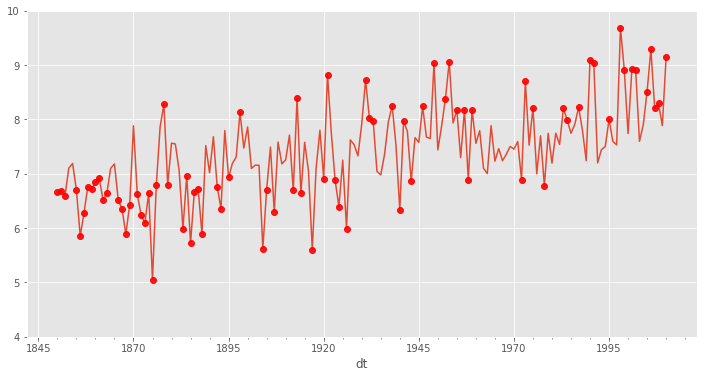

In [38]:
figsize = (12, 6)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.9)

dfTempNewYork_A['u_medf'] = get_median_filtered(dfTempNewYork_A['AverageTemperature'].values, threshold=1)

outlier_idx = np.where(dfTempNewYork_A['u_medf'].values != dfTempNewYork_A['AverageTemperature'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
dfTempNewYork_A['AverageTemperature'].plot()
dfTempNewYork_A['AverageTemperature'][outlier_idx].plot(**kw)
_ = ax.set_ylim(4, 10)
plt.show()

In [39]:
#Outlier Detection method 2
def detect_outlier_position_by_fft(signal, threshold_freq=0.1,
                                   frequency_amplitude=.001):
    signal = signal.copy()
    fft_of_signal = np.fft.fft(signal)
    outlier = np.max(signal) if abs(np.max(signal)) > abs(np.min(signal)) else np.min(signal)
    if np.any(np.abs(fft_of_signal[threshold_freq:]) > frequency_amplitude):
        index_of_outlier = np.where(signal == outlier)
        return index_of_outlier[0]
    else:
        return None

In [40]:

outlier_idx = []

y = dfTempNewYork_A['AverageTemperature'].values

opt = dict(threshold_freq=3, frequency_amplitude=0.001)

win = 20
for k in range(win*2, y.size, win):
    idx = detect_outlier_position_by_fft(y[k-win:k+win], **opt)
    if idx is not None:
        outlier_idx.append(k + idx[0] - win)
outlier_idx = list(set(outlier_idx))

fig, ax = plt.subplots(figsize=(12, 6))

dfTempNewYork_A['AverageTemperature'].plot()
dfTempNewYork_A['AverageTemperature'][outlier_idx].plot(**kw)
_ = ax.set_ylim(4, 10)

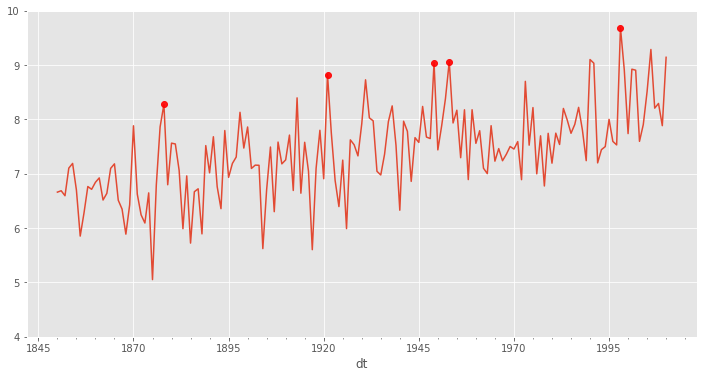

In [41]:
plt.show()

In [42]:
#Outlier Detection method 3
from pandas import rolling_median

threshold = 1.4
dfTempNewYork_A['pandas'] = rolling_median(dfTempNewYork_A['AverageTemperature'], window=3, center=True).fillna(method='bfill').fillna(method='ffill')

difference = np.abs(dfTempNewYork_A['AverageTemperature'] - dfTempNewYork_A['pandas'])
outlier_idx = difference > threshold

fig, ax = plt.subplots(figsize=figsize)
dfTempNewYork_A['AverageTemperature'].plot()
dfTempNewYork_A['AverageTemperature'][outlier_idx].plot(**kw)
_ = ax.set_ylim(4, 10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=True).median()


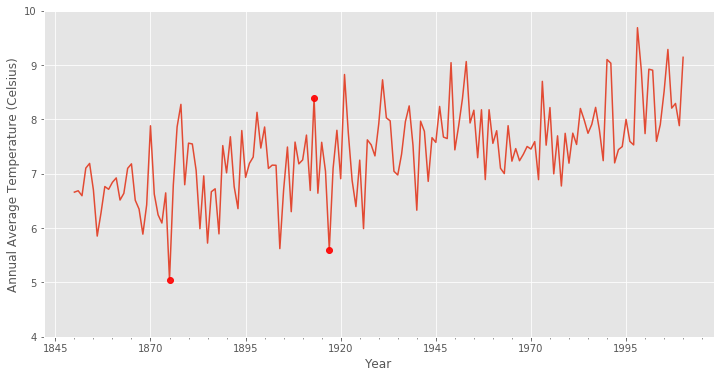

In [43]:
plt.xlabel('Year')
plt.ylabel('Annual Average Temperature (Celsius)')
plt.show()

In [44]:
dfTempNewYork_A_DFT = dfTempNewYork_A['1/1/1850':'31/12/2010']
del dfTempNewYork_A_DFT['AverageTemperatureUncertainty']
del dfTempNewYork_A_DFT['PC']
del dfTempNewYork_A_DFT['pandas']
del dfTempNewYork_A_DFT['u_medf']
dfTempCali_A_DFT = dfTempCali_A['1/1/1850':'31/12/2010']
del dfTempCali_A_DFT['AverageTemperatureUncertainty']
del dfTempCali_A_DFT['PC']
dfTempTex_A_DFT = dfTempTex_A['1/1/1850':'31/12/2010']
del dfTempTex_A_DFT['AverageTemperatureUncertainty']
del dfTempTex_A_DFT['PC']
dfTempFlor_A_DFT = dfTempFlor_A['1/1/1850':'31/12/2010']
del dfTempFlor_A_DFT['AverageTemperatureUncertainty']
del dfTempFlor_A_DFT['PC']
dfTempIL_A_DFT = dfTempIllinois_A['1/1/1850':'31/12/2010']
del dfTempIL_A_DFT['AverageTemperatureUncertainty']
del dfTempIL_A_DFT['PC']


In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(dfTempNewYork_A_DFT):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(dfTempNewYork_A_DFT, window=12)
    rolstd = pd.rolling_std(dfTempNewYork_A_DFT, window=12)

    #Plot rolling statistics:
    orig = plt.plot(dfTempNewYork_A_DFT, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(dfTempNewYork_A_DFT.iloc[:,0].values, autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    
    
def test_stationarity2():
    
    #Determining rolling statistics
    rolmean = pd.rolling_mean(dfTempNewYork_A_DFT, window=12)
    rolstd = pd.rolling_std(dfTempNewYork_A_DFT, window=12)

    #Plot rolling statistics
    orig = plt.plot(dfTempNewYork_A_DFT, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Dickey-Fuller test
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(dfTempNewYork_A_DFT.iloc[:,0].values, autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


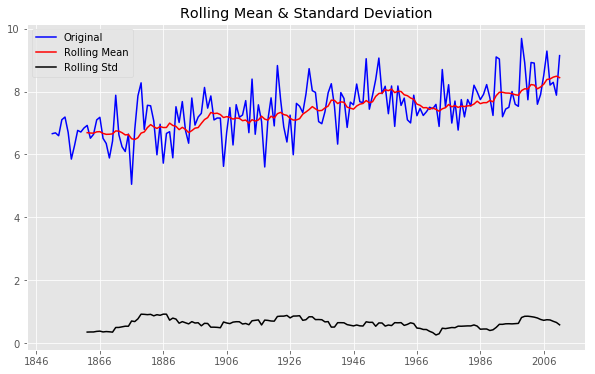

Results of Dickey-Fuller Test:
Test Statistic                  -1.595892
p-value                          0.485657
#Lags Used                       7.000000
Number of Observations Used    153.000000
Critical Value (5%)             -2.880623
Critical Value (1%)             -3.473830
Critical Value (10%)            -2.576945
dtype: float64


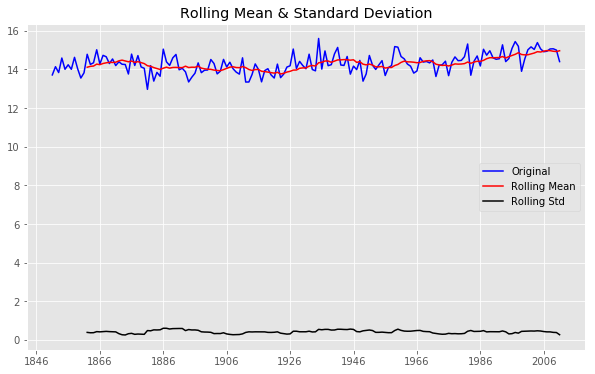

Results of Dickey-Fuller Test:
Test Statistic                  -3.158897
p-value                          0.022491
#Lags Used                       3.000000
Number of Observations Used    157.000000
Critical Value (5%)             -2.880132
Critical Value (1%)             -3.472703
Critical Value (10%)            -2.576683
dtype: float64


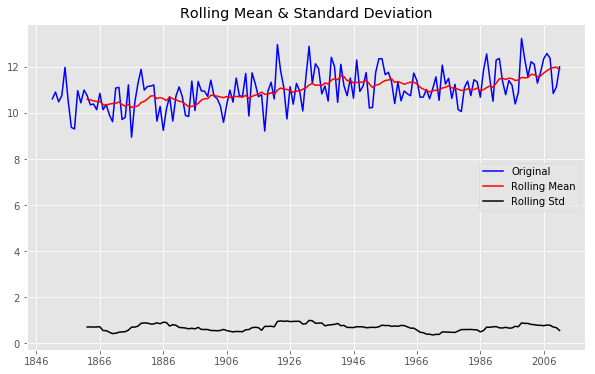

Results of Dickey-Fuller Test:
Test Statistic                  -0.983772
p-value                          0.759137
#Lags Used                      11.000000
Number of Observations Used    149.000000
Critical Value (5%)             -2.881141
Critical Value (1%)             -3.475018
Critical Value (10%)            -2.577221
dtype: float64


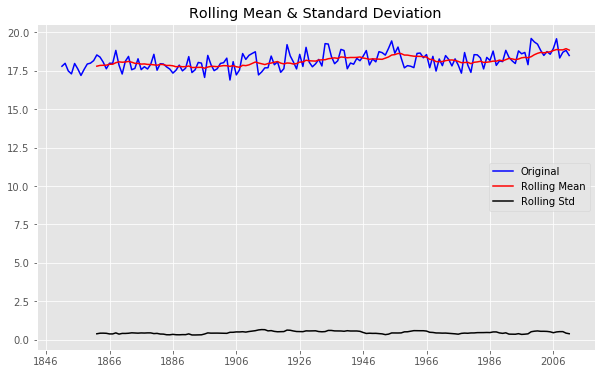

Results of Dickey-Fuller Test:
Test Statistic                  -2.762208
p-value                          0.063878
#Lags Used                       5.000000
Number of Observations Used    155.000000
Critical Value (5%)             -2.880374
Critical Value (1%)             -3.473259
Critical Value (10%)            -2.576812
dtype: float64


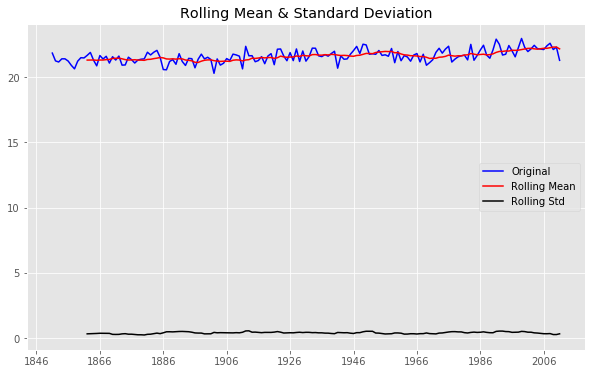

Results of Dickey-Fuller Test:
Test Statistic                  -3.316425
p-value                          0.014160
#Lags Used                       3.000000
Number of Observations Used    157.000000
Critical Value (5%)             -2.880132
Critical Value (1%)             -3.472703
Critical Value (10%)            -2.576683
dtype: float64


In [46]:
test_stationarity(dfTempNewYork_A_DFT)
test_stationarity(dfTempCali_A_DFT)
test_stationarity(dfTempIL_A_DFT)
test_stationarity(dfTempTex_A_DFT)
test_stationarity(dfTempFlor_A_DFT)

In [47]:
#Because the test statistic is higher than the critical values, we can determine that the data is non-stationary 
#and the mean is increasing with time

In [48]:
dfStateEM=pd.read_csv("CO2 Emissions by State.csv")
dfStateEM

,Date,State,California Carbon Emissions Coal (Tg C) x 0.99,California Carbon Emissions Oil (Tg C) x 0.99,California Carbon Emissions Gas (Tg C) x 0.99,California Total Carbon emissions,Resident population including armed forces (thousands of people),Carbon per capita Coal (Mg/person),Carbon per capita Oil (Mg/person),Carbon per capita Gas (Mg/person),Total Per Capita Carbon Emissions
0,1960-01-01,California,0.912388,34.607075,18.649050,54.168512,15717.00000,0.058051,2.201888,1.186553,3.446492
1,1961-01-01,California,1.502045,33.283276,20.057911,54.843232,16497.00000,0.091050,2.017535,1.215852,3.324437
2,1962-01-01,California,1.008395,34.124804,21.250480,56.383680,17072.00000,0.059067,1.998876,1.244756,3.302699
3,1963-01-01,California,1.172213,36.146934,23.255255,60.574402,17668.00000,0.066347,2.045898,1.316236,3.428481
4,1964-01-01,California,1.365232,37.653770,26.032518,65.051519,18151.00000,0.075215,2.074474,1.434219,3.583908
5,1965-01-01,California,1.618596,39.793501,25.974825,67.386922,18585.00000,0.087092,2.141162,1.397623,3.625877
6,1966-01-01,California,1.309128,40.794192,28.397112,70.500432,18858.00000,0.069420,2.163230,1.505839,3.738489
...,...,...,...,...,...,...,...,...,...,...,...
203,1995-01-01,Texas,35.569661,67.170670,57.838966,160.579298,19066.32464,1.865575,3.523000,3.033567,8.422142
204,1996-01-01,Texas,38.734250,73.530269,61.149910,173.414430,19442.92291,1.992203,3.781853,3.145099,8.919154


In [49]:
dfStateEM['Date'] = pd.to_datetime(dfStateEM['Date'])
dfStateEM.dtypes

Date                                                                datetime64[ns]
State                                                                       object
California Carbon Emissions Coal (Tg C) x 0.99                             float64
California Carbon Emissions Oil (Tg C) x 0.99                              float64
California Carbon Emissions Gas (Tg C) x 0.99                              float64
California Total Carbon emissions                                          float64
Resident population including armed forces (thousands of people)           float64
Carbon per capita Coal (Mg/person)                                         float64
Carbon per capita Oil (Mg/person)                                          float64
Carbon per capita Gas (Mg/person)                                          float64
Total Per Capita Carbon Emissions                                          float64
dtype: object

In [50]:
dfStateEM['Date'] = pd.to_datetime(dfStateEM['Date'])


In [51]:
dfStateEM.index = dfStateEM['Date']

In [52]:
del dfStateEM ['Date']

In [53]:
pd.options.display.max_rows = 15
dfStateEM ['1/1/1960':'12/31/2001']

,State,California Carbon Emissions Coal (Tg C) x 0.99,California Carbon Emissions Oil (Tg C) x 0.99,California Carbon Emissions Gas (Tg C) x 0.99,California Total Carbon emissions,Resident population including armed forces (thousands of people),Carbon per capita Coal (Mg/person),Carbon per capita Oil (Mg/person),Carbon per capita Gas (Mg/person),Total Per Capita Carbon Emissions
Date,,,,,,,,,,
1960-01-01,California,0.912388,34.607075,18.649050,54.168512,15717.00000,0.058051,2.201888,1.186553,3.446492
1961-01-01,California,1.502045,33.283276,20.057911,54.843232,16497.00000,0.091050,2.017535,1.215852,3.324437
1962-01-01,California,1.008395,34.124804,21.250480,56.383680,17072.00000,0.059067,1.998876,1.244756,3.302699
1963-01-01,California,1.172213,36.146934,23.255255,60.574402,17668.00000,0.066347,2.045898,1.316236,3.428481
1964-01-01,California,1.365232,37.653770,26.032518,65.051519,18151.00000,0.075215,2.074474,1.434219,3.583908
1965-01-01,California,1.618596,39.793501,25.974825,67.386922,18585.00000,0.087092,2.141162,1.397623,3.625877
1966-01-01,California,1.309128,40.794192,28.397112,70.500432,18858.00000,0.069420,2.163230,1.505839,3.738489
...,...,...,...,...,...,...,...,...,...,...
1995-01-01,Texas,35.569661,67.170670,57.838966,160.579298,19066.32464,1.865575,3.523000,3.033567,8.422142


In [54]:
dfStateEM=dfStateEM.rename(columns = {'California Carbon Emissions Coal (Tg C) x 0.99':'C_EM_coal'})
dfStateEM=dfStateEM.rename(columns = {'California Carbon Emissions Oil (Tg C) x 0.99':'C_EM_oil'})
dfStateEM=dfStateEM.rename(columns = {'California Carbon Emissions Gas (Tg C) x 0.99':'C_EM_gas'})
dfStateEM=dfStateEM.rename(columns = {'California Total Carbon emissions':'TotalC_EM'})
dfStateEM=dfStateEM.rename(columns ={'Resident population including armed forces (thousands of people)':'Res_Pop'})
dfStateEM=dfStateEM.rename(columns ={'Carbon per capita Coal (Mg/person)':'C_Person_coal'})
dfStateEM=dfStateEM.rename(columns ={'Carbon per capita Oil (Mg/person)':'C_Person_oil'})
dfStateEM=dfStateEM.rename(columns ={'Carbon per capita Gas (Mg/person)':'C_Person_gas'})
dfStateEM=dfStateEM.rename(columns ={'Total Per Capita Carbon Emissions':'C_Person_total'})



In [55]:
pd.options.display.max_columns=10
dfStateEM

,State,C_EM_coal,C_EM_oil,C_EM_gas,TotalC_EM,Res_Pop,C_Person_coal,C_Person_oil,C_Person_gas,C_Person_total
Date,,,,,,,,,,
1960-01-01,California,0.912388,34.607075,18.649050,54.168512,15717.00000,0.058051,2.201888,1.186553,3.446492
1961-01-01,California,1.502045,33.283276,20.057911,54.843232,16497.00000,0.091050,2.017535,1.215852,3.324437
1962-01-01,California,1.008395,34.124804,21.250480,56.383680,17072.00000,0.059067,1.998876,1.244756,3.302699
1963-01-01,California,1.172213,36.146934,23.255255,60.574402,17668.00000,0.066347,2.045898,1.316236,3.428481
1964-01-01,California,1.365232,37.653770,26.032518,65.051519,18151.00000,0.075215,2.074474,1.434219,3.583908
1965-01-01,California,1.618596,39.793501,25.974825,67.386922,18585.00000,0.087092,2.141162,1.397623,3.625877
1966-01-01,California,1.309128,40.794192,28.397112,70.500432,18858.00000,0.069420,2.163230,1.505839,3.738489
...,...,...,...,...,...,...,...,...,...,...
1995-01-01,Texas,35.569661,67.170670,57.838966,160.579298,19066.32464,1.865575,3.523000,3.033567,8.422142


In [56]:
#Use actual number of resident population
dfStateEM['Res_PopTotal']=dfStateEM['Res_Pop']*1000
del dfStateEM['Res_Pop']


In [57]:
#Convert C_EM_coal	C_EM_oil	C_EM_gas	TotalC_EM from Terragram to Metric tonnes
#C_Person_coal	C_Person_oil	C_Person_gas	C_Person_total are represented in megagrams where 1Mg= 1 tonne
#No conversion is required for those columns
dfStateEM['C_EM_coalmt']=dfStateEM['C_EM_coal']*1000000
del dfStateEM['C_EM_coal']

dfStateEM['C_EM_oilmt']=dfStateEM['C_EM_oil']*1000000
del dfStateEM['C_EM_oil']

dfStateEM['C_EM_gasmt']=dfStateEM['C_EM_gas']*1000000
del dfStateEM['C_EM_gas']

dfStateEM['TotalC_EMmt']=dfStateEM['TotalC_EM']*1000000
del dfStateEM['TotalC_EM']

In [58]:
dfStateEM

,State,C_Person_coal,C_Person_oil,C_Person_gas,C_Person_total,Res_PopTotal,C_EM_coalmt,C_EM_oilmt,C_EM_gasmt,TotalC_EMmt
Date,,,,,,,,,,
1960-01-01,California,0.058051,2.201888,1.186553,3.446492,15717000.00,9.123882e+05,34607074.78,18649049.50,5.416851e+07
1961-01-01,California,0.091050,2.017535,1.215852,3.324437,16497000.00,1.502045e+06,33283276.27,20057910.81,5.484323e+07
1962-01-01,California,0.059067,1.998876,1.244756,3.302699,17072000.00,1.008395e+06,34124803.80,21250480.43,5.638368e+07
1963-01-01,California,0.066347,2.045898,1.316236,3.428481,17668000.00,1.172213e+06,36146933.63,23255255.14,6.057440e+07
1964-01-01,California,0.075215,2.074474,1.434219,3.583908,18151000.00,1.365232e+06,37653769.64,26032517.77,6.505152e+07
1965-01-01,California,0.087092,2.141162,1.397623,3.625877,18585000.00,1.618596e+06,39793500.96,25974825.09,6.738692e+07
1966-01-01,California,0.069420,2.163230,1.505839,3.738489,18858000.00,1.309128e+06,40794191.75,28397112.10,7.050043e+07
...,...,...,...,...,...,...,...,...,...,...
1995-01-01,Texas,1.865575,3.523000,3.033567,8.422142,19066324.64,3.556966e+07,67170670.42,57838966.25,1.605793e+08


In [59]:
#Multiply Total Carbon Emission tons/person by Resident Population
dfStateEM['Res_EM_Total']= dfStateEM['Res_PopTotal'] * dfStateEM['C_Person_total']


In [60]:
dfNewYorkEM=dfStateEM.loc[dfStateEM['State'] == 'New York']  
dfCaliEM=dfStateEM.loc[dfStateEM['State'] == 'California']  
dfIllinoisEM=dfStateEM.loc[dfStateEM['State'] == 'Illinois']  
dfFlorEM=dfStateEM.loc[dfStateEM['State'] == 'Florida']  
dfTexEM=dfStateEM.loc[dfStateEM['State'] == 'Texas']  


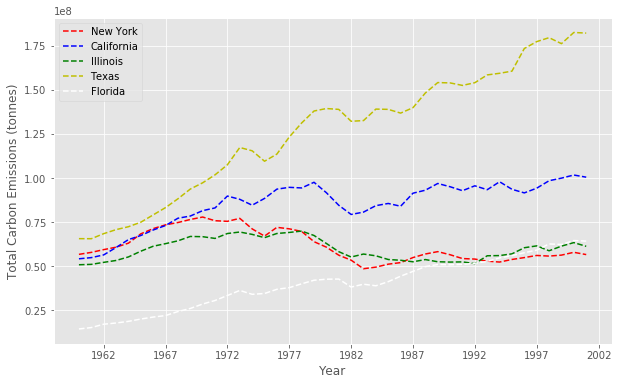

In [61]:
plt.plot(dfNewYorkEM.index, dfNewYorkEM['Res_EM_Total'],'k--',color='r', label='New York')
plt.plot(dfCaliEM.index, dfCaliEM['Res_EM_Total'], 'k--',color='b', label = 'California')
plt.plot(dfIllinoisEM.index, dfIllinoisEM['Res_EM_Total'], 'k--',color='g', label='Illinois')
plt.plot(dfTexEM.index, dfTexEM['Res_EM_Total'], 'k--',color='y', label='Texas')
plt.plot(dfFlorEM.index, dfFlorEM['Res_EM_Total'], 'k--',color='w', label='Florida')
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (tonnes)')
plt.legend()
plt.show()

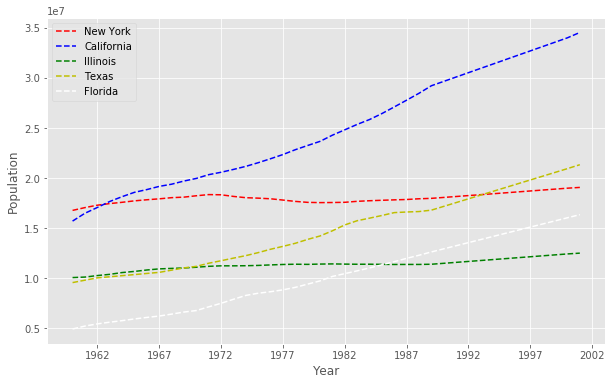

In [67]:
#Pop_Incr = [
    #(dt(2001,1,1), '% Increase'),
    #(dt(2001,1,1), '% Increase'),
    #(dt(2001,1,1), '% Increase')]

#for date, label in Pop_Incr:
    #ax.annotate(label, xy=(date, dfNewYorkEM.asof(date)),
      #          xytext=(date, dfNewYorkEM.asof(date)),
    #         arrowprops=dict(facecolor='black'),
    #            horizontalalignment='left', verticalalignment='top')
    
plt.plot(dfNewYorkEM.index, dfNewYorkEM['Res_PopTotal'],'k--',color='r', label='New York')
plt.plot(dfCaliEM.index, dfCaliEM['Res_PopTotal'], 'k--',color='b', label = 'California')
plt.plot(dfIllinoisEM.index, dfIllinoisEM['Res_PopTotal'], 'k--',color='g', label='Illinois')
plt.plot(dfTexEM.index, dfTexEM['Res_PopTotal'], 'k--',color='y', label='Texas')
plt.plot(dfFlorEM.index, dfFlorEM['Res_PopTotal'], 'k--',color='w', label='Florida')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

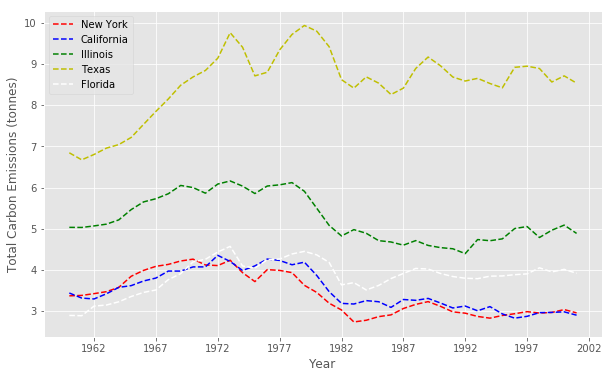

In [68]:
plt.plot(dfNewYorkEM.index, dfNewYorkEM['C_Person_total'],'k--',color='r', label='New York')
plt.plot(dfCaliEM.index, dfCaliEM['C_Person_total'], 'k--',color='b', label = 'California')
plt.plot(dfIllinoisEM.index, dfIllinoisEM['C_Person_total'], 'k--',color='g', label='Illinois')
plt.plot(dfTexEM.index, dfTexEM['C_Person_total'], 'k--',color='y', label='Texas')
plt.plot(dfFlorEM.index, dfFlorEM['C_Person_total'], 'k--',color='w', label='Florida')
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (tonnes)')
plt.legend()
plt.show()

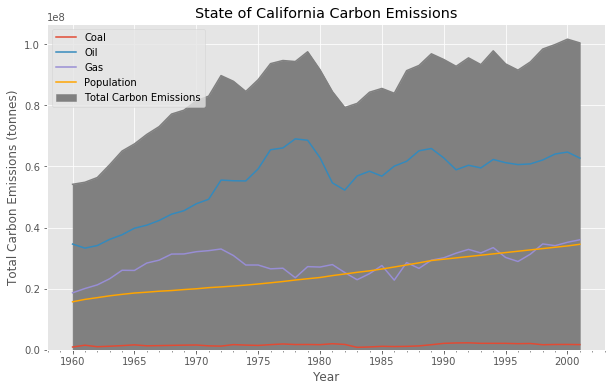

In [69]:
plt.figure()
dfCaliEM.C_EM_coalmt.plot(label='Coal')
dfCaliEM.C_EM_oilmt.plot(label='Oil')
dfCaliEM.C_EM_gasmt.plot(label='Gas')
dfCaliEM.Res_PopTotal.plot(label='Population', color='orange')
dfCaliEM.TotalC_EMmt.plot.area(label='Total Carbon Emissions', color='gray')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (tonnes)')
plt.title('State of California Carbon Emissions')
plt.show()

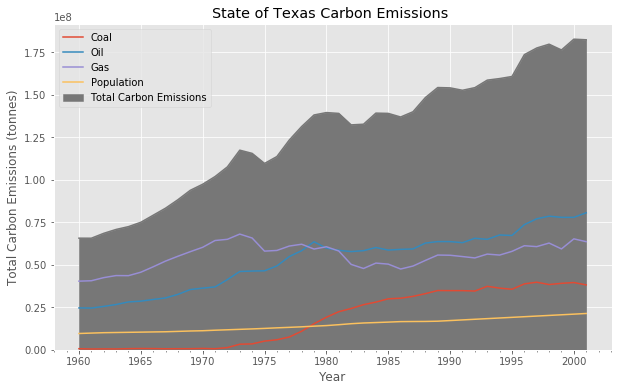

In [70]:
plt.figure()
dfTexEM.C_EM_coalmt.plot(label='Coal')
dfTexEM.C_EM_oilmt.plot(label='Oil')
dfTexEM.C_EM_gasmt.plot(label='Gas')
dfTexEM.TotalC_EMmt.plot.area(label='Total Carbon Emissions')
dfTexEM.Res_PopTotal.plot (label='Population')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (tonnes)')
plt.title('State of Texas Carbon Emissions ')

plt.show()

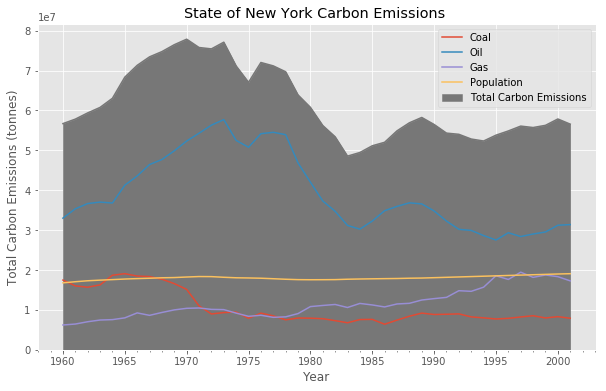

In [71]:
plt.figure()
dfNewYorkEM.C_EM_coalmt.plot(label='Coal')
dfNewYorkEM.C_EM_oilmt.plot(label='Oil')
dfNewYorkEM.C_EM_gasmt.plot(label='Gas')
dfNewYorkEM.TotalC_EMmt.plot.area(label='Total Carbon Emissions')
dfNewYorkEM.Res_PopTotal.plot (label='Population')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (tonnes)')
plt.title('State of New York Carbon Emissions ')

plt.show()

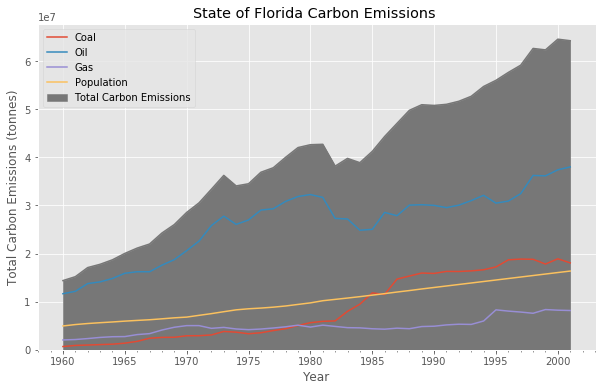

In [72]:
plt.figure()
dfFlorEM.C_EM_coalmt.plot(label='Coal')
dfFlorEM.C_EM_oilmt.plot(label='Oil')
dfFlorEM.C_EM_gasmt.plot(label='Gas')
dfFlorEM.TotalC_EMmt.plot.area(label='Total Carbon Emissions')
dfFlorEM.Res_PopTotal.plot (label='Population')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (tonnes)')
plt.title('State of Florida Carbon Emissions ')

plt.show()

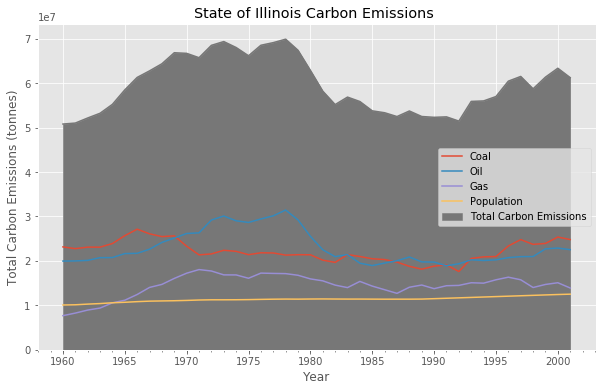

In [73]:
plt.figure()
dfIllinoisEM.C_EM_coalmt.plot(label='Coal')
dfIllinoisEM.C_EM_oilmt.plot(label='Oil')
dfIllinoisEM.C_EM_gasmt.plot(label='Gas')
dfIllinoisEM.TotalC_EMmt.plot.area(label='Total Carbon Emissions')
dfIllinoisEM.Res_PopTotal.plot (label='Population')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (tonnes)')
plt.title('State of Illinois Carbon Emissions ')

plt.show()

In [74]:
pd.options.display.max_columns=210
dfIllinoisEM

,State,C_Person_coal,C_Person_oil,C_Person_gas,C_Person_total,Res_PopTotal,C_EM_coalmt,C_EM_oilmt,C_EM_gasmt,TotalC_EMmt,Res_EM_Total
Date,,,,,,,,,,,
1960-01-01,Illinois,2.296788,1.980121,0.761847,5.038756,10081000.00,23153919.45,19961598.40,7.680179e+06,50795696.46,5.079570e+07
1961-01-01,Illinois,2.246966,1.973865,0.815327,5.036158,10130000.00,22761764.01,19995247.60,8.259264e+06,51016276.07,5.101628e+07
1962-01-01,Illinois,2.246970,1.957121,0.869600,5.073690,10280000.00,23098849.39,20119204.98,8.939483e+06,52157537.51,5.215754e+07
1963-01-01,Illinois,2.220302,1.993186,0.903068,5.116556,10402000.00,23095586.21,20733117.88,9.393715e+06,53222419.29,5.322242e+07
1964-01-01,Illinois,2.259852,1.961810,0.998337,5.220000,10580000.00,23909235.43,20755951.25,1.056241e+07,55227595.66,5.522760e+07
1965-01-01,Illinois,2.401705,2.024527,1.043165,5.469397,10693000.00,25681426.75,21648270.84,1.115456e+07,58484261.37,5.848426e+07
1966-01-01,Illinois,2.504535,2.003080,1.148325,5.655940,10836000.00,27139139.62,21705376.82,1.244325e+07,61287769.64,6.128777e+07
...,...,...,...,...,...,...,...,...,...,...,...
1995-01-01,Illinois,1.753222,1.690819,1.315930,4.759971,11971077.64,20987960.81,20240927.15,1.575310e+07,56981985.14,5.698199e+07


In [75]:
PC_PopNY=(19074843-16782000)/19074843
PC_PopFlor=(16355193-4952000)/16355193
PC_PopTex=(21340598-9580000)/21340598
PC_PopIl=(12517168-10081000)/12517168

In [76]:
PC_PopNY

0.12020245723647634

In [77]:
PC_PopFlor

0.6972215491434434

In [78]:
PC_PopTex

0.5510903677582043

In [79]:
PC_PopIl

0.19462613268432605

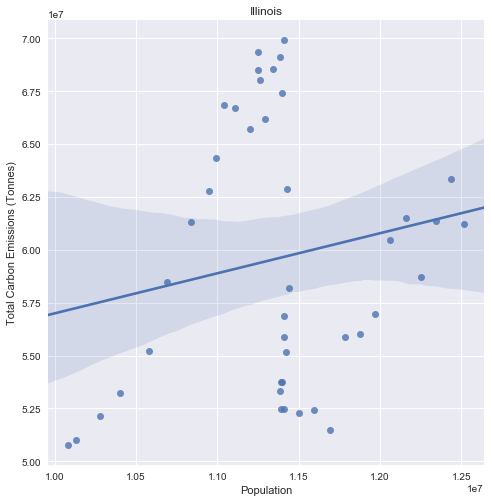

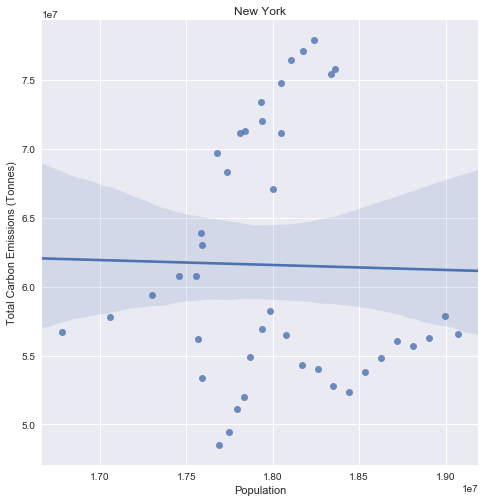

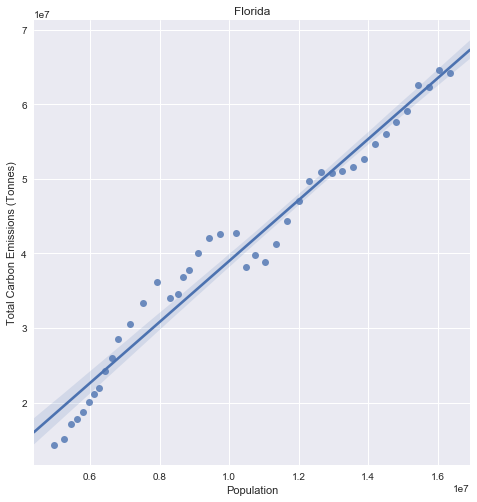

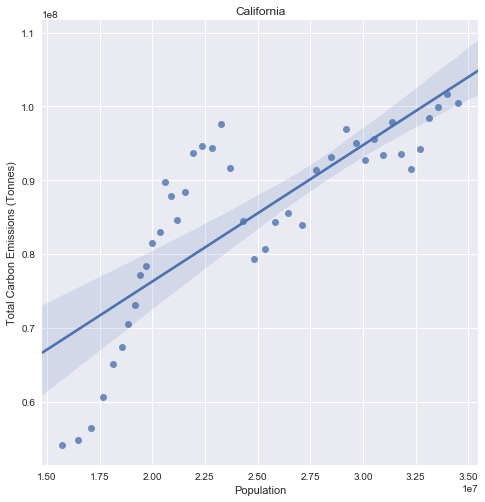

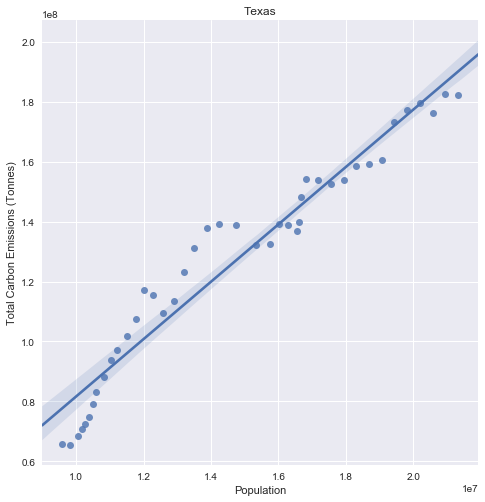

In [80]:
import seaborn as sns
sns.pairplot(dfIllinoisEM, x_vars=['Res_PopTotal'], y_vars='Res_EM_Total', size=7, kind='reg')
plt.title('Illinois')
plt.xlabel('Population')
plt.ylabel('Total Carbon Emissions (Tonnes)')

sns.pairplot(dfNewYorkEM, x_vars=['Res_PopTotal'], y_vars='Res_EM_Total', size=7, kind='reg')
plt.title('New York')
plt.xlabel('Population')
plt.ylabel('Total Carbon Emissions (Tonnes)')

sns.pairplot(dfFlorEM, x_vars=['Res_PopTotal'], y_vars='Res_EM_Total', size=7, kind='reg')
plt.title('Florida')
plt.xlabel('Population')
plt.ylabel('Total Carbon Emissions (Tonnes)')

sns.pairplot(dfCaliEM, x_vars=['Res_PopTotal'], y_vars='Res_EM_Total', size=7, kind='reg')
plt.title('California')
plt.xlabel('Population')
plt.ylabel('Total Carbon Emissions (Tonnes)')

sns.pairplot(dfTexEM, x_vars=['Res_PopTotal'], y_vars='Res_EM_Total', size=7, kind='reg')
plt.xlabel('Population')
plt.ylabel('Total Carbon Emissions (Tonnes)')
plt.title('Texas')
plt.show()

In [81]:
X = dfIllinoisEM[['Res_PopTotal']]

y = dfIllinoisEM[['Res_EM_Total']]

X = sm.add_constant(X)
ols= sm.OLS(y.astype(float), X.astype(float)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Res_EM_Total   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.284
Date:                Thu, 24 May 2018   Prob (F-statistic):              0.264
Time:                        19:19:31   Log-Likelihood:                -715.10
No. Observations:                  42   AIC:                             1434.
Df Residuals:                      40   BIC:                             1438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.806e+07    1.9e+07      2.002      0.052   -3.66e+05    7.65e+07
Res_PopTotal     1.8936      1.671      1.133      0.264      -1.484       5.271
==============================================================================
Omnibus:                       15.063   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.889
Skew:                           0.352   Prob(JB):                        0.143
Kurtosis:                       1.686   Cond. No.                     2.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
X = dfTexEM[['Res_PopTotal']]

y = dfTexEM[['Res_EM_Total']]

X = sm.add_constant(X)
ols= sm.OLS(y.astype(float), X.astype(float)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Res_EM_Total   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     620.4
Date:                Thu, 24 May 2018   Prob (F-statistic):           5.70e-26
Time:                        19:19:31   Log-Likelihood:                -730.82
No. Observations:                  42   AIC:                             1466.
Df Residuals:                      40   BIC:                             1469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.413e+07   5.82e+06     -2.426      0.020   -2.59e+07   -2.36e+06
Res_PopTotal     9.5771      0.384     24.908      0.000       8.800      10.354
==============================================================================
Omnibus:                        1.924   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.812
Skew:                           0.430   Prob(JB):                        0.404
Kurtosis:                       2.455   Cond. No.                     6.40e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
X = dfFlorEM[['Res_PopTotal']]

y = dfFlorEM[['Res_EM_Total']]

X = sm.add_constant(X)
ols= sm.OLS(y.astype(float), X.astype(float)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Res_EM_Total   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1033.
Date:                Thu, 24 May 2018   Prob (F-statistic):           3.44e-30
Time:                        19:19:31   Log-Likelihood:                -683.04
No. Observations:                  42   AIC:                             1370.
Df Residuals:                      40   BIC:                             1374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.872e+06   1.37e+06     -1.366      0.180   -4.64e+06    8.98e+05
Res_PopTotal     4.0855      0.127     32.139      0.000       3.829       4.342
==============================================================================
Omnibus:                        3.680   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.407
Skew:                           0.393   Prob(JB):                        0.300
Kurtosis:                       2.129   Cond. No.                     3.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
X = dfNewYorkEM[['Res_PopTotal']]

y = dfNewYorkEM[['Res_EM_Total']]

X = sm.add_constant(X)
ols= sm.OLS(y.astype(float), X.astype(float)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Res_EM_Total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.01604
Date:                Thu, 24 May 2018   Prob (F-statistic):              0.900
Time:                        19:19:31   Log-Likelihood:                -731.10
No. Observations:                  42   AIC:                             1466.
Df Residuals:                      40   BIC:                             1470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.801e+07    5.1e+07      1.335      0.190    -3.5e+07    1.71e+08
Res_PopTotal    -0.3581      2.828     -0.127      0.900      -6.073       5.357
==============================================================================
Omnibus:                        9.442   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                4.168
Skew:                           0.519   Prob(JB):                        0.124
Kurtosis:                       1.858   Cond. No.                     6.61e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
X = dfCaliEM[['Res_PopTotal']]

y = dfCaliEM[['Res_EM_Total']]

X = sm.add_constant(X)
ols= sm.OLS(y.astype(float), X.astype(float)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Res_EM_Total   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     72.23
Date:                Thu, 24 May 2018   Prob (F-statistic):           1.69e-10
Time:                        19:19:31   Log-Likelihood:                -725.27
No. Observations:                  42   AIC:                             1455.
Df Residuals:                      40   BIC:                             1458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.932e+07   5.53e+06      7.107      0.000    2.81e+07    5.05e+07
Res_PopTotal     1.8472      0.217      8.499      0.000       1.408       2.286
==============================================================================
Omnibus:                        0.369   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.516
Skew:                           0.181   Prob(JB):                        0.773
Kurtosis:                       2.595   Cond. No.                     1.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""